In [30]:
import pandas as pd
import random
import matplotlib.pyplot as plt

import spacy
from spacy.tokens import DocBin
spacy.prefer_gpu()

True

In [22]:
def evaluate(data):
    # This function evaluates if the model predict correctly the categorization of the title.
    nlp = spacy.load("./textcat-model/model-best")
    prediction = 0.5
    fp, fn, tp, tn = 0, 0, 0, 0
    
    for i in data:
        doc = nlp(i[0])
        cats = doc.cats
        if cats['NEGATIVE'] > prediction and i[1]['cats']['NEGATIVE'] == True:
            tn += 1
        elif cats['NEGATIVE'] > prediction and i[1]['cats']['NEGATIVE'] == False:
            fn += 1
        elif cats['POSITIVE'] > prediction and i[1]['cats']['POSITIVE'] == True:
            tp += 1
        elif cats['POSITIVE'] > prediction and i[1]['cats']['POSITIVE'] == False:
            fp =+ 1
    temp = {"TrueNegative": tn, "FalseNegative": fn, "TruePositive": tp, "FalsePositive": fp}

    return temp

In [5]:
def categorization(row):
        if row['valoration'] == 1:
            return {"POSITIVE": True, "NEGATIVE": False}
        elif row['valoration'] == 0:
            return {"POSITIVE": False, "NEGATIVE": True}
        

In [3]:
train_data_raw = pd.read_excel('./datasets/train_data.xlsx')

In [6]:
train_data_raw['cats'] = train_data_raw.apply(categorization, axis = 1)

In [7]:
train_data_raw

,title,valoration,cats
0,Hito científico: consiguen restaurar la activi...,1,"{'POSITIVE': True, 'NEGATIVE': False}"
1,¡Ofertón en Amazon!: Esta Tablet con Windows 1...,1,"{'POSITIVE': True, 'NEGATIVE': False}"
2,Esta playa española ha sido elegida como la me...,1,"{'POSITIVE': True, 'NEGATIVE': False}"
3,Beneficios del humor: por qué reír nos hace ta...,1,"{'POSITIVE': True, 'NEGATIVE': False}"
4,España es la mejor del mundo en piragüismo: oc...,1,"{'POSITIVE': True, 'NEGATIVE': False}"
...,...,...,...
162,"Le patearon la puerta de su casa, fue a ver y ...",0,"{'POSITIVE': False, 'NEGATIVE': True}"
163,Transporte: persisten las quejas de usuarios y...,0,"{'POSITIVE': False, 'NEGATIVE': True}"
164,Colón jugó mal y la sacó barata: cayó por 1 a ...,0,"{'POSITIVE': False, 'NEGATIVE': True}"
165,Habló el primer médico francés que intentó soc...,0,"{'POSITIVE': False, 'NEGATIVE': True}"


In [8]:
train_list = [[i.title, {"cats": i.cats}] for i in train_data_raw.itertuples()]

In [9]:
random.shuffle(train_list)

In [10]:
train = random.sample(train_list, k = round(len(train_list)*.6))
temp = [i for i in train_list if i not in train]
dev = random.sample(temp, k = round(len(temp)*.5))
test = [i for i in train_list if i not in train and i not in dev]

In [11]:
print(len(train), len(test), len(dev))

100 33 33


In [12]:
# load the nlp model to the train
nlp = spacy.load("es_core_news_sm")

In [13]:
# the DocBin will store the example documents
db = DocBin()
docs = []

for element in train:
    doc = nlp(element[0])
    doc.cats = element[1]['cats']
    print(doc.cats)
    db.add(doc)
db.to_disk("./train-stuff/train.spacy")

{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE':

In [14]:
# the DocBin will store the example documents
db = DocBin()
docs = []

for element in test:
    doc = nlp(element[0])
    doc.cats = element[1]['cats']
    print(doc.cats)
    db.add(doc)
db.to_disk("./train-stuff/dev.spacy")

{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': False, 'NEGATIVE': True}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE': True, 'NEGATIVE': False}
{'POSITIVE':

In [15]:
test

[['¡Ofertón en Amazon!: Esta Tablet con Windows 10 tiene un descuento de 60€',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}],
 ['Asesinan a padre que se opuso a robo',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}],
 ['Día del Orgasmo Femenino: 5 curiosidades científicas sobre esta maravillosa y compleja experiencia',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}],
 ['Violencia machista y crimen organizado, conflictos a los que se enfrenta la gobernadora de Colima',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}],
 ['El calor mata: la mortalidad se dispara en las olas cada vez más extremas',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}],
 ['La odisea de una mujer hostigada por un "trapito" en la ciudad de Santa Fe',
  {'cats': {'POSITIVE': False, 'NEGATIVE': True}}],
 ['Johnny Depp volverá como director al cine y Al Pacino será su productor',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}],
 ['Una madre y su hija, acusadas de aborto ilegal en EEUU después de que

In [17]:
# Kernel that initialize the training
!python -m spacy train ./train-stuff/config.cfg --paths.train ./train-stuff/train.spacy --paths.dev ./train-stuff/dev.spacy --output ./textcat-model/ --gpu-id 0

[i] Saving to output directory: textcat-model
[i] Using GPU: 0

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['textcat']
[i] Initial learn rate: 0.0
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          1.00       28.26    0.28
100     200        186.76       52.55    0.53
200     400        125.31       52.55    0.53
300     600         73.06       58.75    0.59
400     800         45.41       64.35    0.64
500    1000         30.15       74.13    0.74
600    1200         21.32       74.13    0.74
700    1400         15.36       78.48    0.78
800    1600         11.07       78.48    0.78
900    1800          8.00       86.36    0.86
1000    2000          5.77       89.99    0.90
1100    2200          4.22       89.99    0.90
1200    2400          3.11       89.99    0.90
1300   

[2022-09-11 21:42:25,252] [INFO] Set up nlp object from config
[2022-09-11 21:42:25,264] [INFO] Pipeline: ['textcat']
[2022-09-11 21:42:25,267] [INFO] Created vocabulary
[2022-09-11 21:42:25,268] [INFO] Finished initializing nlp object
[2022-09-11 21:42:28,287] [INFO] Initialized pipeline components: ['textcat']


## Testing

This machine learning model was tested by the F1-Score. Which is a measure of accuracy. It's calculated from the precision and recall of the test

Accuracy is not the best test when you have class imbalance. Therefore I used F1-Score

In [23]:
e = evaluate(test)
e

{'TrueNegative': 20,
 'FalseNegative': 3,
 'TruePositive': 10,
 'FalsePositive': 0}

In [24]:
p, n = 0, 0
for i in test:
    if i[1]['cats']['POSITIVE'] == True:
        p+=1
    else:
        n+=1


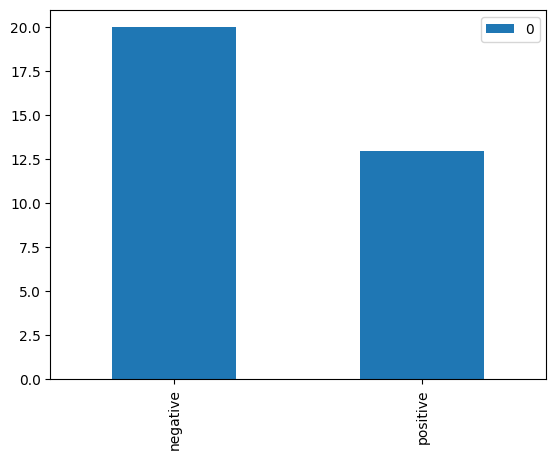

In [25]:
test_df = pd.DataFrame([n,p], index=['negative', 'positive']).plot.bar()

In [26]:
accuracy = (e['TrueNegative'] + e['TruePositive']) / (e['TrueNegative'] + e['FalseNegative'] + e['TruePositive'] + e['FalsePositive'])
accuracy

0.9090909090909091

In [27]:
precision = e['TruePositive'] / (e['TruePositive'] + e['FalsePositive'])
precision_percentage = round(precision*100, 2)
precision_percentage

100.0

In [28]:
recall = e['TrueNegative'] / (e['TrueNegative'] + e['FalseNegative'])
recall_percentage = round(recall*100, 2)
recall_percentage

86.96

In [29]:
f1_score = (2 * precision * recall) / (precision + recall)
f1_score = round(f1_score*100, 2)
f1_score

93.02